In [1]:
import os 
code_dir=os.getcwd()

#working directory for the data
decrypt_dir = os.path.join(os.path.abspath(os.sep), 'n', 'scratch', 'users', 'a', 'abk397', 'decryptMproteomics')



In [2]:
import pandas as pd
PTMs=pd.read_excel('Experiment_summary.xlsx',sheet_name='PTMs')
FullProteome=pd.read_excel('Experiment_summary.xlsx',sheet_name='Fullproteome')
Kinobeads=pd.read_excel('Experiment_summary.xlsx',sheet_name='Kinobeads')

import matplotlib.pyplot as plt


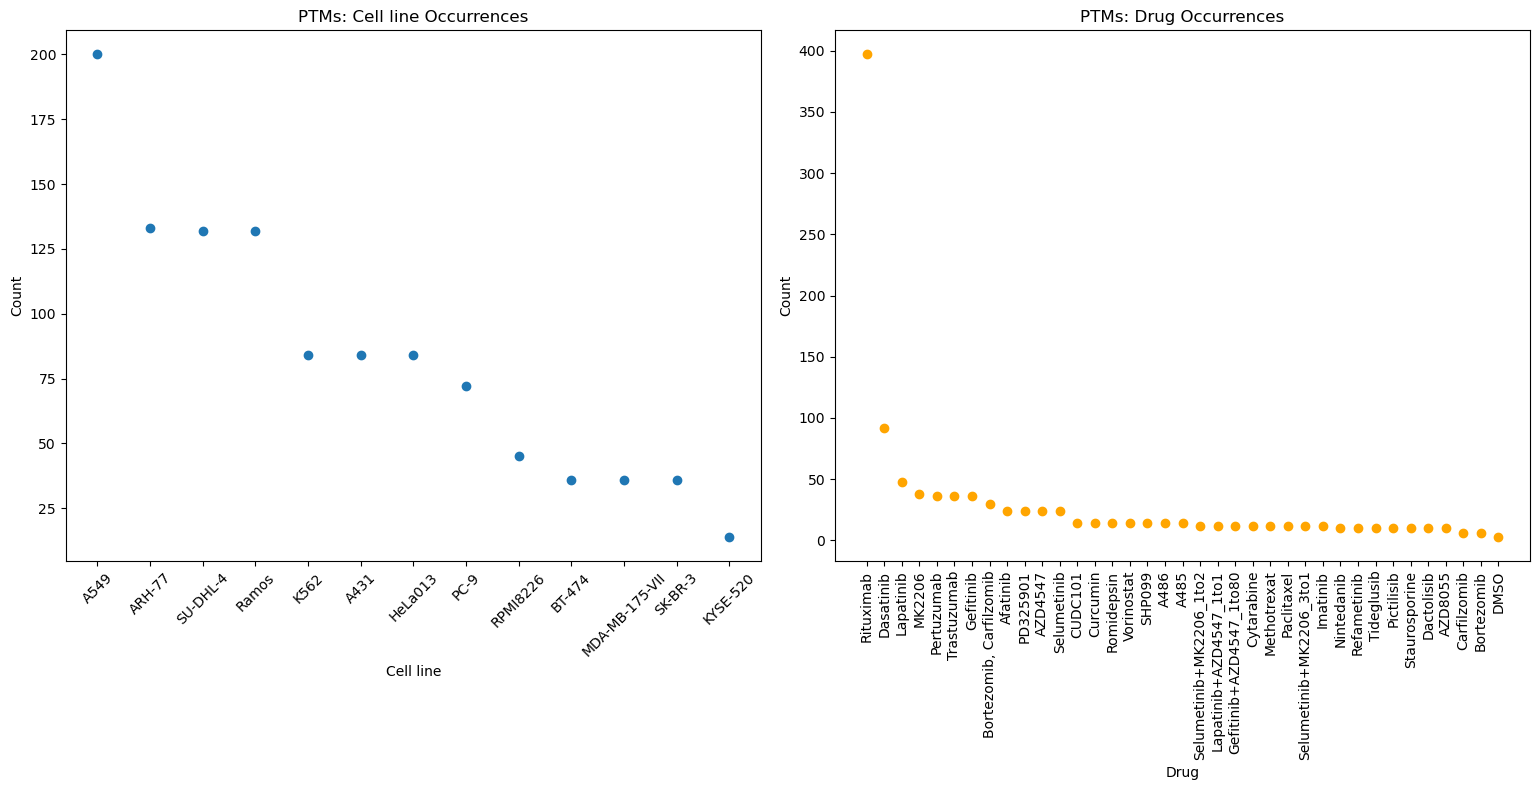

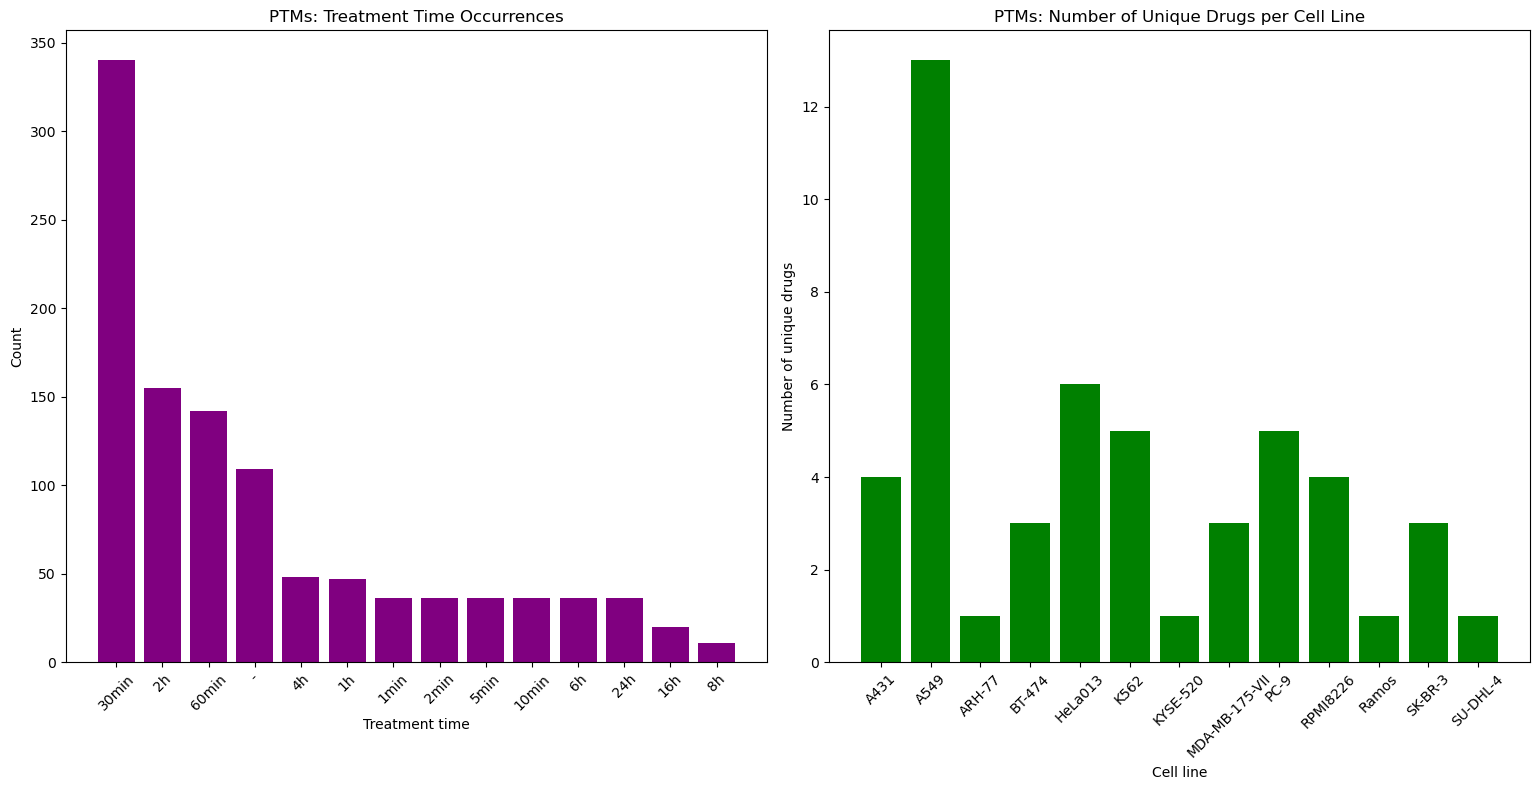

In PTMs, the (Cell line, Drug) combination with the most unique treatment times:
  Cell line: ARH-77, Drug: Rituximab, Num unique treatment times: 9


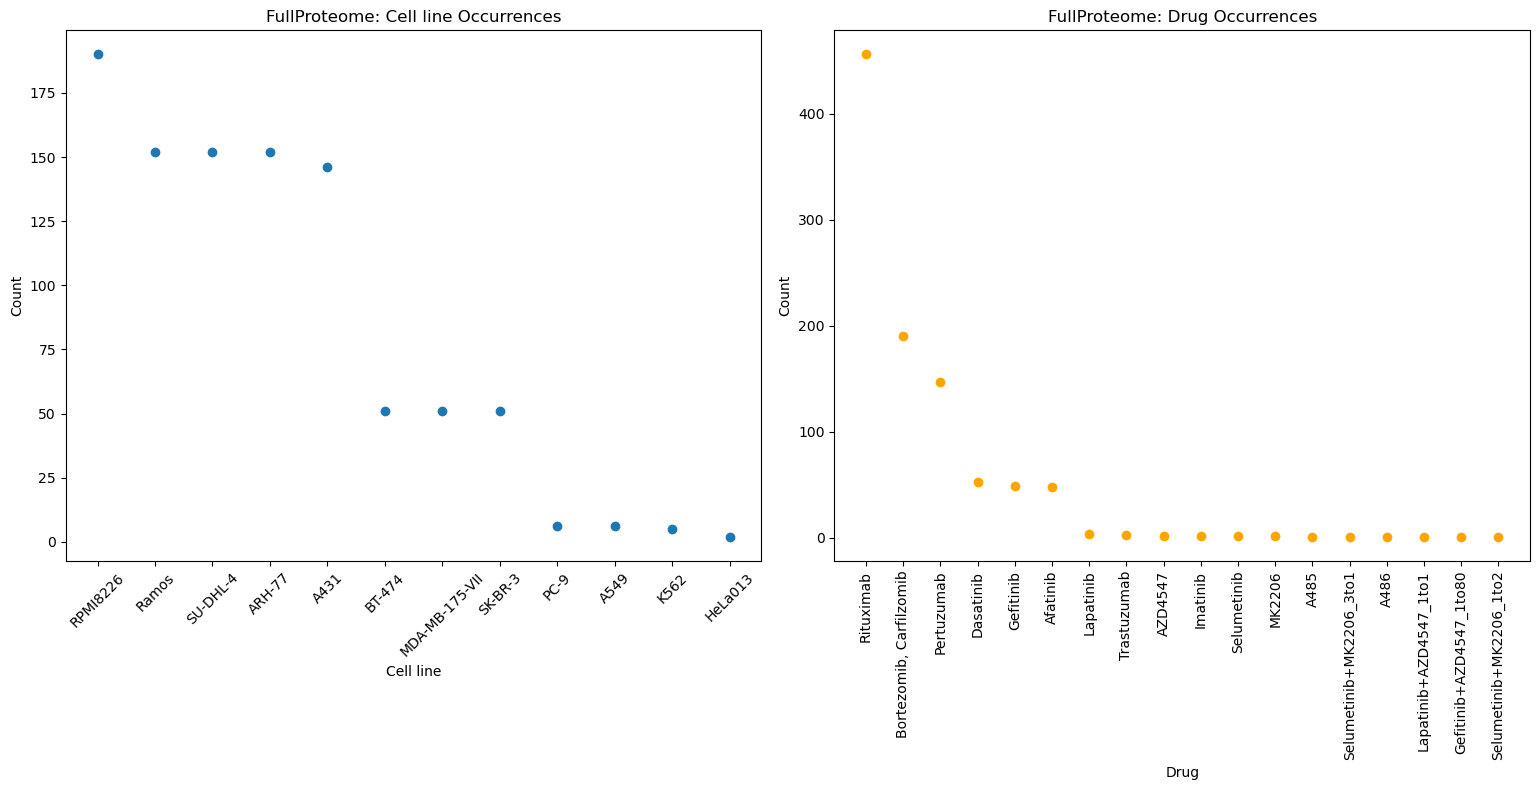

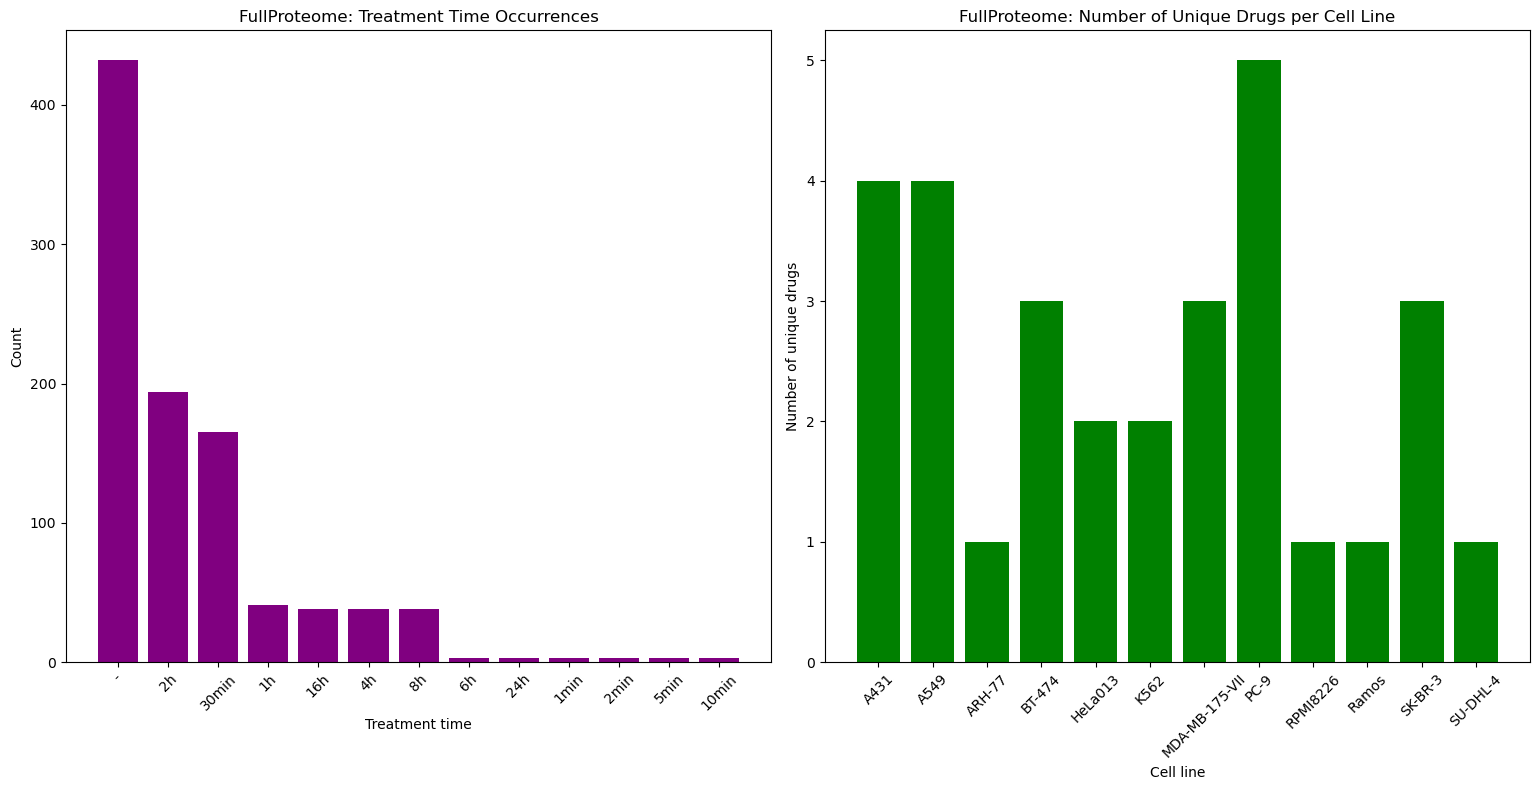

In FullProteome, the (Cell line, Drug) combination with the most unique treatment times:
  Cell line: ARH-77, Drug: Rituximab, Num unique treatment times: 9
Column 'Cell line' not found in Kinobeads


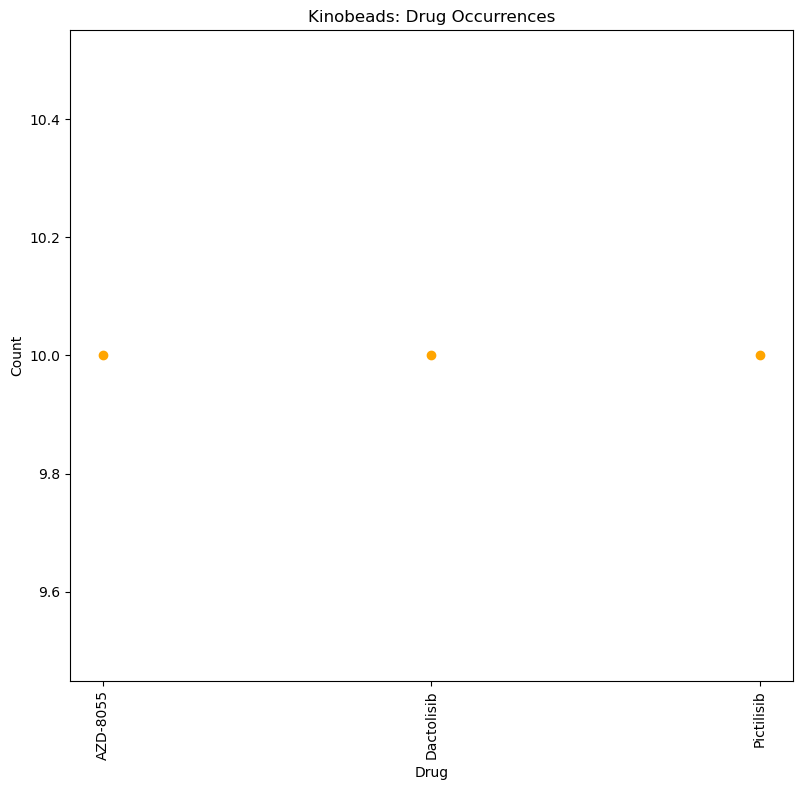

Could not determine drug+cell line combo with most unique treatment times in Kinobeads: Relevant columns missing


In [3]:
import matplotlib.pyplot as plt

# Define mapping of file name to dataframe
dataframes = {
    'PTMs': PTMs,
    'FullProteome': FullProteome,
    'Kinobeads': Kinobeads
}

for name, df in dataframes.items():
    plots_made = False

    # --- Cell line count and drug count as subplots (1x2) ---
    has_cell_line = 'Cell line' in df.columns
    has_drug = 'Drug' in df.columns

    if has_cell_line or has_drug:
        fig, axs = plt.subplots(1, 2, figsize=(15.5, 8))
        subplot_count = 0

        # Cell line occurrences scatter
        if has_cell_line:
            cellline_counts = df['Cell line'].value_counts()
            axs[0].scatter(cellline_counts.index, cellline_counts.values)
            axs[0].set_title(f'{name}: Cell line Occurrences')
            axs[0].set_xlabel('Cell line')
            axs[0].set_ylabel('Count')
            axs[0].tick_params(axis='x', rotation=45)
            subplot_count += 1
        else:
            axs[0].set_visible(False)
            print(f"Column 'Cell line' not found in {name}")

        # Drug occurrences scatter
        if has_drug:
            drug_counts = df['Drug'].value_counts()
            axs[1].scatter(drug_counts.index, drug_counts.values, color='orange')
            axs[1].set_title(f'{name}: Drug Occurrences')
            axs[1].set_xlabel('Drug')
            axs[1].set_ylabel('Count')
            # Make drug names vertical
            axs[1].tick_params(axis='x', labelrotation=90)
            for label in axs[1].get_xticklabels():
                label.set_rotation(90)
                label.set_ha('center')
            subplot_count += 1
        else:
            axs[1].set_visible(False)
            print(f"Column 'Drug' not found in {name}")

        if subplot_count > 0:
            plt.tight_layout()
            plt.show()
        plots_made = True

    # --- Treatment time & unique drug per cell line as subplots (1x2) ---
    has_treatment_time = 'Treatment time' in df.columns

    # Only try to plot if at least one of the required columns exist
    if has_treatment_time or (has_cell_line and has_drug):
        fig, axs = plt.subplots(1, 2, figsize=(15.5, 8))
        subplot_count = 0

        # Treatment time bar
        if has_treatment_time:
            time_counts = df['Treatment time'].value_counts()
            axs[0].bar(time_counts.index.astype(str), time_counts.values, color='purple')
            axs[0].set_title(f'{name}: Treatment Time Occurrences')
            axs[0].set_xlabel('Treatment time')
            axs[0].set_ylabel('Count')
            axs[0].tick_params(axis='x', rotation=45)
            subplot_count += 1
        else:
            axs[0].set_visible(False)
            print(f"Column 'Treatment time' not found in {name}")

        # Unique drug count per cell line bar
        if has_cell_line and has_drug:
            drugs_per_cellline = df.groupby('Cell line')['Drug'].nunique()
            axs[1].bar(drugs_per_cellline.index, drugs_per_cellline.values, color='green')
            axs[1].set_title(f'{name}: Number of Unique Drugs per Cell Line')
            axs[1].set_xlabel('Cell line')
            axs[1].set_ylabel('Number of unique drugs')
            # If the x-axis is cell lines, generally keep as before.
            axs[1].tick_params(axis='x', rotation=45)
            subplot_count += 1
        elif has_cell_line:
            axs[1].set_visible(False)
            print(f"Column 'Drug' not found for cell line vs unique drugs plot in {name}")
        elif has_drug:
            axs[1].set_visible(False)
            print(f"Column 'Cell line' not found for cell line vs unique drugs plot in {name}")
        else:
            axs[1].set_visible(False)

        if subplot_count > 0:
            plt.tight_layout()
            plt.show()
        plots_made = True

    # --- Drug + cell line combo with most unique treatment times ---
    if all(col in df.columns for col in ['Cell line', 'Drug', 'Treatment time']):
        unique_times_per_combo = (
            df.groupby(['Cell line', 'Drug'])['Treatment time']
            .nunique()
            .reset_index()
            .rename(columns={'Treatment time': 'NumUniqueTimes'})
        )
        max_row = unique_times_per_combo.loc[unique_times_per_combo['NumUniqueTimes'].idxmax()]
        print(f"In {name}, the (Cell line, Drug) combination with the most unique treatment times:")
        print(f"  Cell line: {max_row['Cell line']}, Drug: {max_row['Drug']}, Num unique treatment times: {max_row['NumUniqueTimes']}")
        print("="*40)
    else:
        print(f"Could not determine drug+cell line combo with most unique treatment times in {name}: Relevant columns missing")


In [4]:
# Print the names of unique drugs used for cell line 'PC-9' in the full proteome DataFrame
full_proteome_df = dataframes.get('FullProteome')
if full_proteome_df is not None:
    if 'Cell line' in full_proteome_df.columns and 'Drug' in full_proteome_df.columns:
        pc9_drugs = full_proteome_df[full_proteome_df['Cell line'] == 'PC-9']['Drug'].unique()
        print("In full proteome, unique drugs for cell line 'PC-9':")
        print(pc9_drugs)
        print("="*40)
    else:
        print("Required columns not found in full proteome DataFrame.")
else:
    print("full proteome DataFrame not found in dfs.")

# Print the names of unique drugs used for cell line 'A549' in the PTMs DataFrame
ptms_df = dataframes.get('PTMs')
if ptms_df is not None:
    if 'Cell line' in ptms_df.columns and 'Drug' in ptms_df.columns:
        a549_drugs = ptms_df[ptms_df['Cell line'] == 'A549']['Drug'].unique()
        print("In PTMs dataframe, unique drugs for cell line 'A549':")
        print(a549_drugs)
        print("="*40)
    else:
        print("Required columns not found in PTMs DataFrame.")
else:
    print("PTMs DataFrame not found in dfs.")


In full proteome, unique drugs for cell line 'PC-9':
['Gefitinib' 'AZD4547' 'Gefitinib+AZD4547_1to80' 'Lapatinib'
 'Lapatinib+AZD4547_1to1']
In PTMs dataframe, unique drugs for cell line 'A549':
['Selumetinib' 'MK2206' 'Selumetinib+MK2206_1to2'
 'Selumetinib+MK2206_3to1' 'PD325901' 'AZD8055' 'Dactolisib' 'Dasatinib'
 'Nintedanib' 'Pictilisib' 'Tideglusib' 'Refametinib' 'Staurosporine']


In [5]:
#figuring out what is different between the two dataframes:
#pulling a curves.txt
path=r'/n/scratch/users/a/abk397/decryptMproteomics/3_EGFR_Inhibitors/Fullproteome/curves.txt'
EGFR_proteome_curves_file=pd.read_csv(path,sep='\t')


In [6]:
phosph_path=r'/n/scratch/users/a/abk397/decryptMproteomics/3_EGFR_Inhibitors/Phosphoproteome/curves.txt'
phosph_proteome_curves_file=pd.read_csv(phosph_path,sep='\t')
# Only keep the rows in phosph_proteome_curves_file where 'Fullproteome' is True
if 'Fullproteome' in phosph_proteome_curves_file.columns:
    phosph_proteome_curves_file = phosph_proteome_curves_file[phosph_proteome_curves_file['Fullproteome'] == True]
else:
    print("'Fullproteome' column not found in phosph_proteome_curves_file.")

